# Good morning everyone! In today's exercise I want to introduce three commonly used data visulization libraries to you: (1) Matplotlib, (2) Seaborn, and (3) Bokeh.

# Library 1: Matplotlib
### Matplotlib is the most basic yet comprehensive Python library for creating visulizations such as linecharts, barcharts, and piecharts

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## Let's work with a simple case first
### Suppost you want to plot a line chart with x = [1, 2, 3] and y = [1, 4, 9]

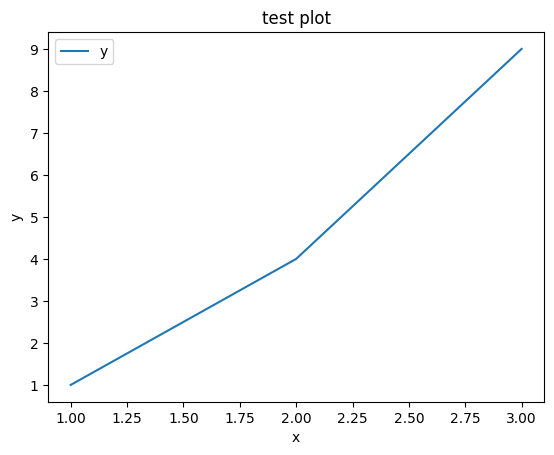

In [3]:
x = [1, 2, 3]
y = [1, 4, 9]

plt.plot(x, y) # simply having this line of code will generate the figure

plt.title("test plot") # set the title of the figure
plt.xlabel("x") # x-axis label
plt.ylabel("y") # y-axis label
plt.legend(["y"]) # set legend, this function takes a list as input
plt.show() # display the figure

### What if you want to plot multiple lines in one figure? Say adding another x and z = [10, 4, 2] in the above figure

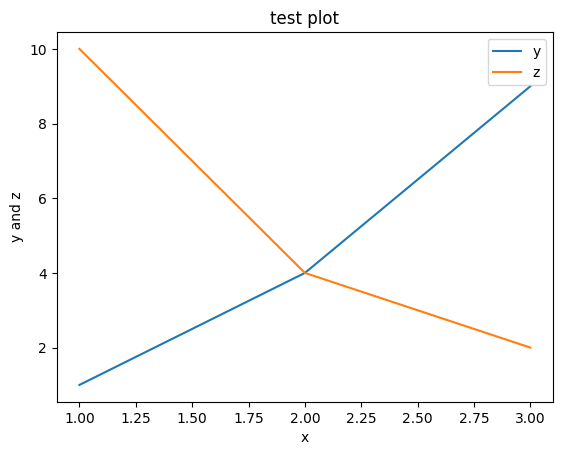

In [4]:
x = [1, 2, 3]
y = [1, 4, 9]
z = [10, 4, 2]

plt.plot(x, y)
plt.plot(x, z)

plt.title("test plot") # set the title of the figure
plt.xlabel("x") # x-axis label
plt.ylabel("y and z") # y-axis label
plt.legend(["y", "z"]) # set legend for both line y and z
plt.show() # display the figure

## Let's import a larger dataset from Pandas

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('countries.csv') # the file stores the population info for a list of countries over years
df.head(5); # let's take a glance of our data

### Suppose we want to compare the population growth in the US and Japan

In [7]:
us = df.loc[df['country'] == 'United States']
japan = df.loc[df['country'] == 'Japan']

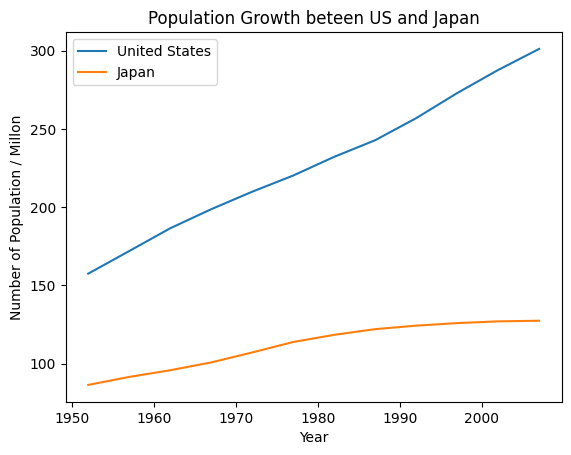

In [8]:
plt.plot(us['year'], us['population'] / 10 ** 6)
plt.plot(japan['year'], japan['population'] / 10 ** 6)

plt.title('Population Growth beteen US and Japan')
plt.xlabel('Year')
plt.ylabel('Number of Population / Millon')
plt.legend(['United States', 'Japan'])
plt.show()

### We can change the color and line styles

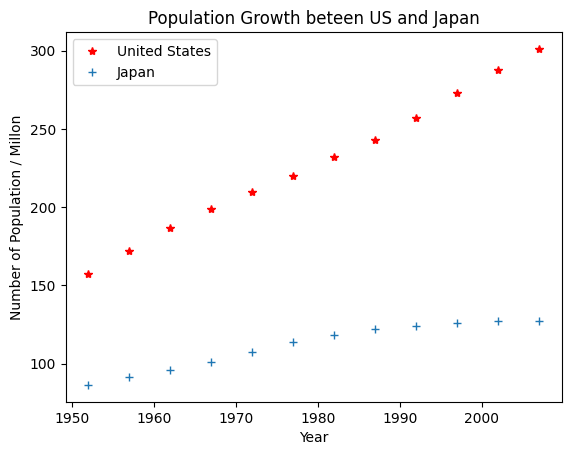

In [156]:
plt.plot(us['year'], us['population'] / 10 ** 6, 'r*') # r: red; *: star marker
plt.plot(japan['year'], japan['population'] / 10 ** 6, '+') # b: blue; +: plus marker
# for more line styles and color choices, refer to the matplotlib document: 
# https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

plt.title('Population Growth beteen US and Japan')
plt.xlabel('Year')
plt.ylabel('Number of Population / Millon')
plt.legend(['United States', 'Japan'])
plt.show()

### How to create a figure with multiple sub-figures?

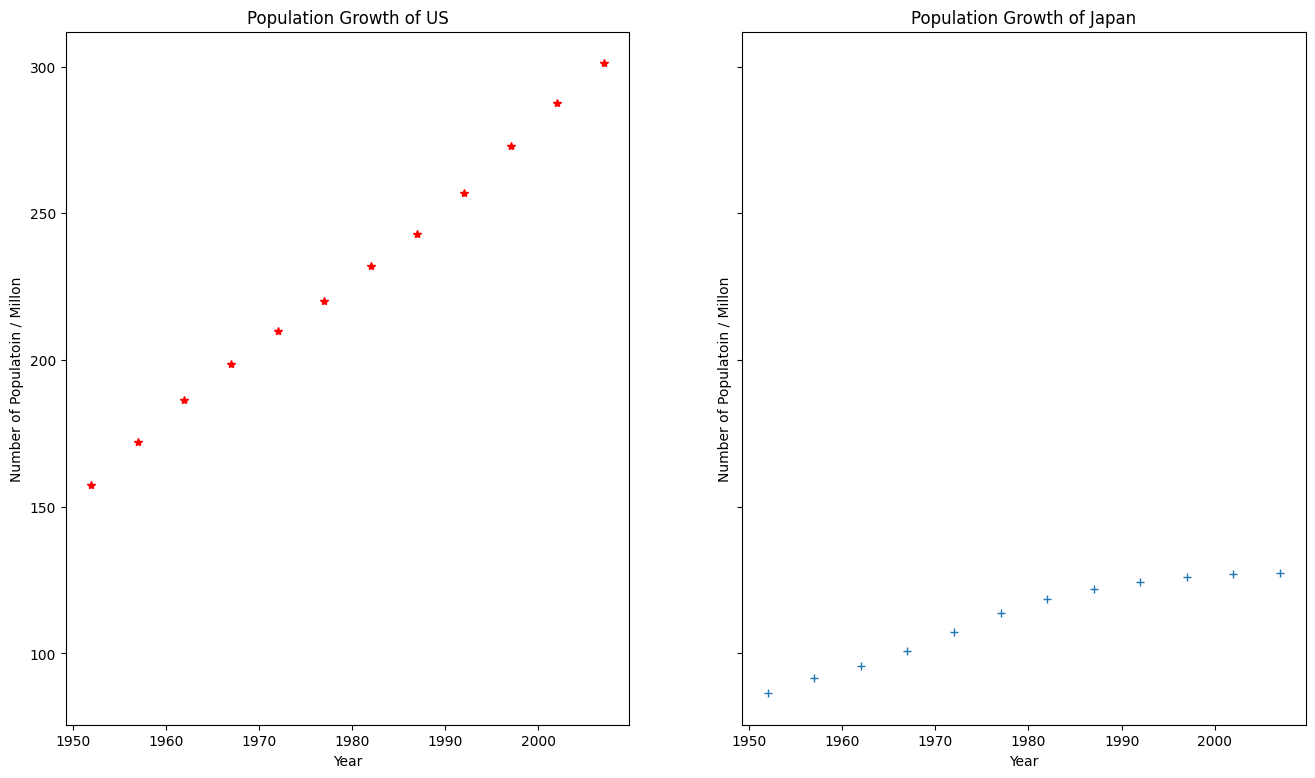

In [157]:
# Create one fig with two subplots
# subplots(a, b) splits one figure with a rows and b columns
# sharex and sharey parameter set the two subplots share the same x and y axis
# figsize parameter adjusts the size of the fig
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9)) 
ax1.plot(us['year'], us['population'] / 10 ** 6, 'r*')
ax2.plot(japan['year'], japan['population'] / 10 ** 6, '+')

ax1.set_title('Population Growth of US')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Populatoin / Millon')
ax2.set_title('Population Growth of Japan')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Populatoin / Millon')
plt.show()

## Other than line chart, Matplotlib supports other plot types, commonly used types in Data Visualization Analyses include Bar Chart, Pie Chart, and Scatter

### Bar Chart

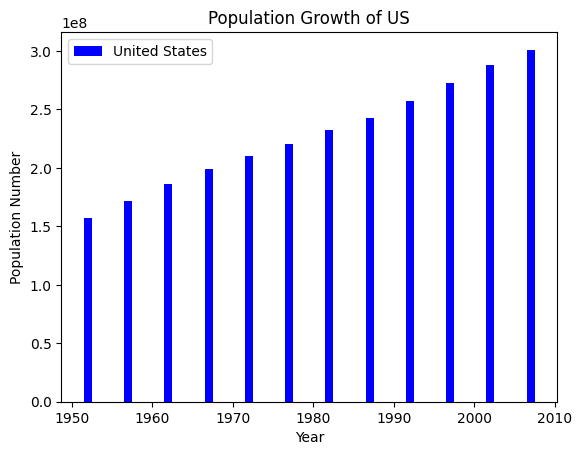

In [158]:
plt.bar(us['year'], us['population'], width=1, color='b') # set bar width to 1, default is 0.8; set bar color to blue

plt.title('Population Growth of US')
plt.xlabel('Year')
plt.ylabel('Population Number')
plt.legend(['United States'])
plt.show()

### Similarly, you can see how to plot a Pie Chart and a Scatter Plot in the Matplotlib document
### Link: https://matplotlib.org/stable/plot_types/index.html

# Library 2: Seaborn
### Seaborn is also a Python library used for plotting graphs with the help of Matplotlib, Pandas, and Numpy. With fewer lines of codes, seaborn creates beautiful graphics. It is commonly used to picture time-series data.

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

## Let's load the 'titanic' dataset from seaborn

In [170]:
df = sns.load_dataset('titanic')
df.head(5) # let's take a glance of the dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Seaborn supports many plot types, other than basic plot types provided by Matplotlib, it also supports advanced plot types, such as Box Plot, Violin Plot, Histogram Plot, and Pair Plot.

### Box Plot
### A box plot shows the descriptive statistics of the data, including minumim, maximum, medium, etc. Outliers that are significantly out of the distribution will be plotted as individual dots.
### Suppose we want to compare the 'Age' distribution among passengers from three different classes

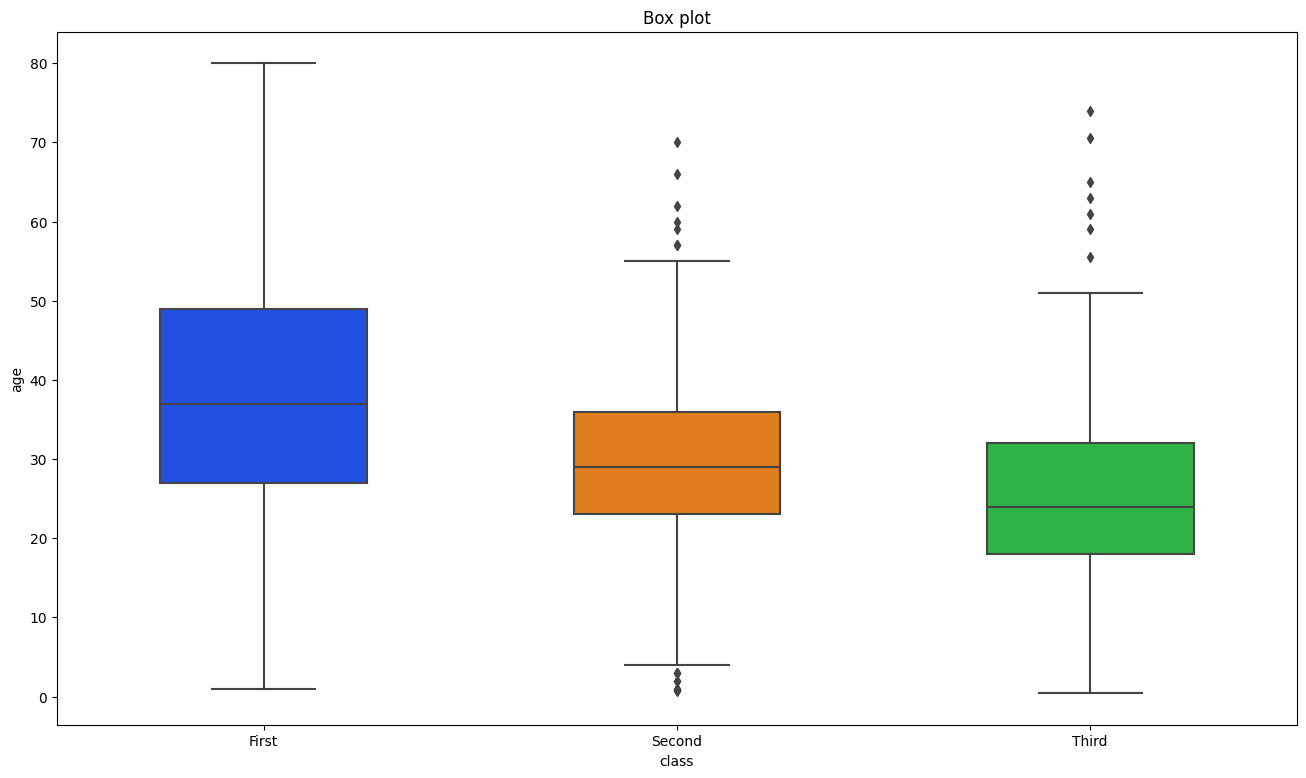

In [192]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=df, x="class", y="age", width=0.5, palette="bright") # palette is a color-pattern parameter, try others like 'coolwarm', 'dark', 'colorblind'
plt.title("Box plot")
plt.show()

### We can dig into the above figure and compare the age distribution of male and females passengers among three classes. Simply adding 'hue' parameter.

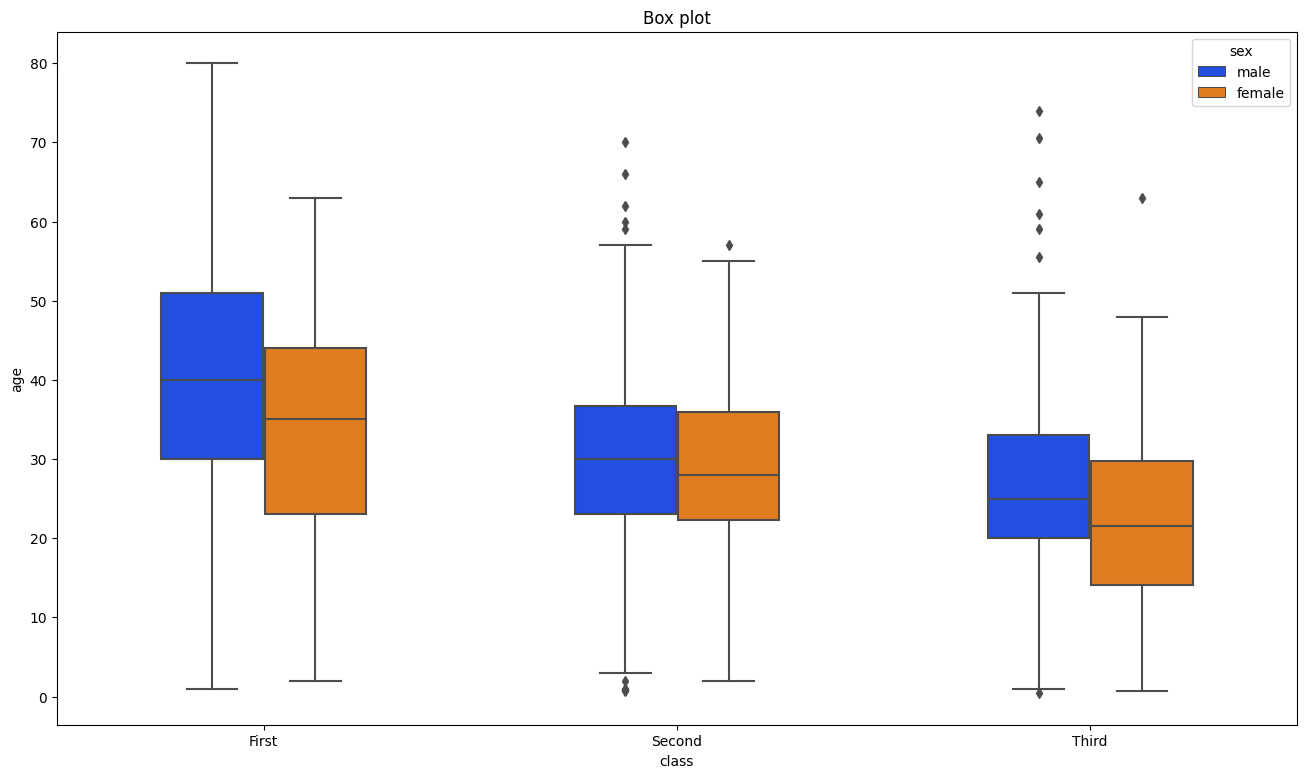

In [195]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=df,
            x="class",
            y="age",
            hue="sex",
            width=0.5,    # width of plots
            palette = "bright",
       )

plt.title("Box plot")
plt.show()

# you can experiment with replacing 'sns.boxplot' with 'sns.violinplot' in the above code

### Pair Plot
### A pair plot displays the relationship between each variable in your data frame. It helps us understands the potential trends between pairwise variables in your dataset.

### It is in matrix format where the row name represents x axis and column name represents the y axis. The main-diagonal subplots are the univariate histograms (distributions) for each attribute.

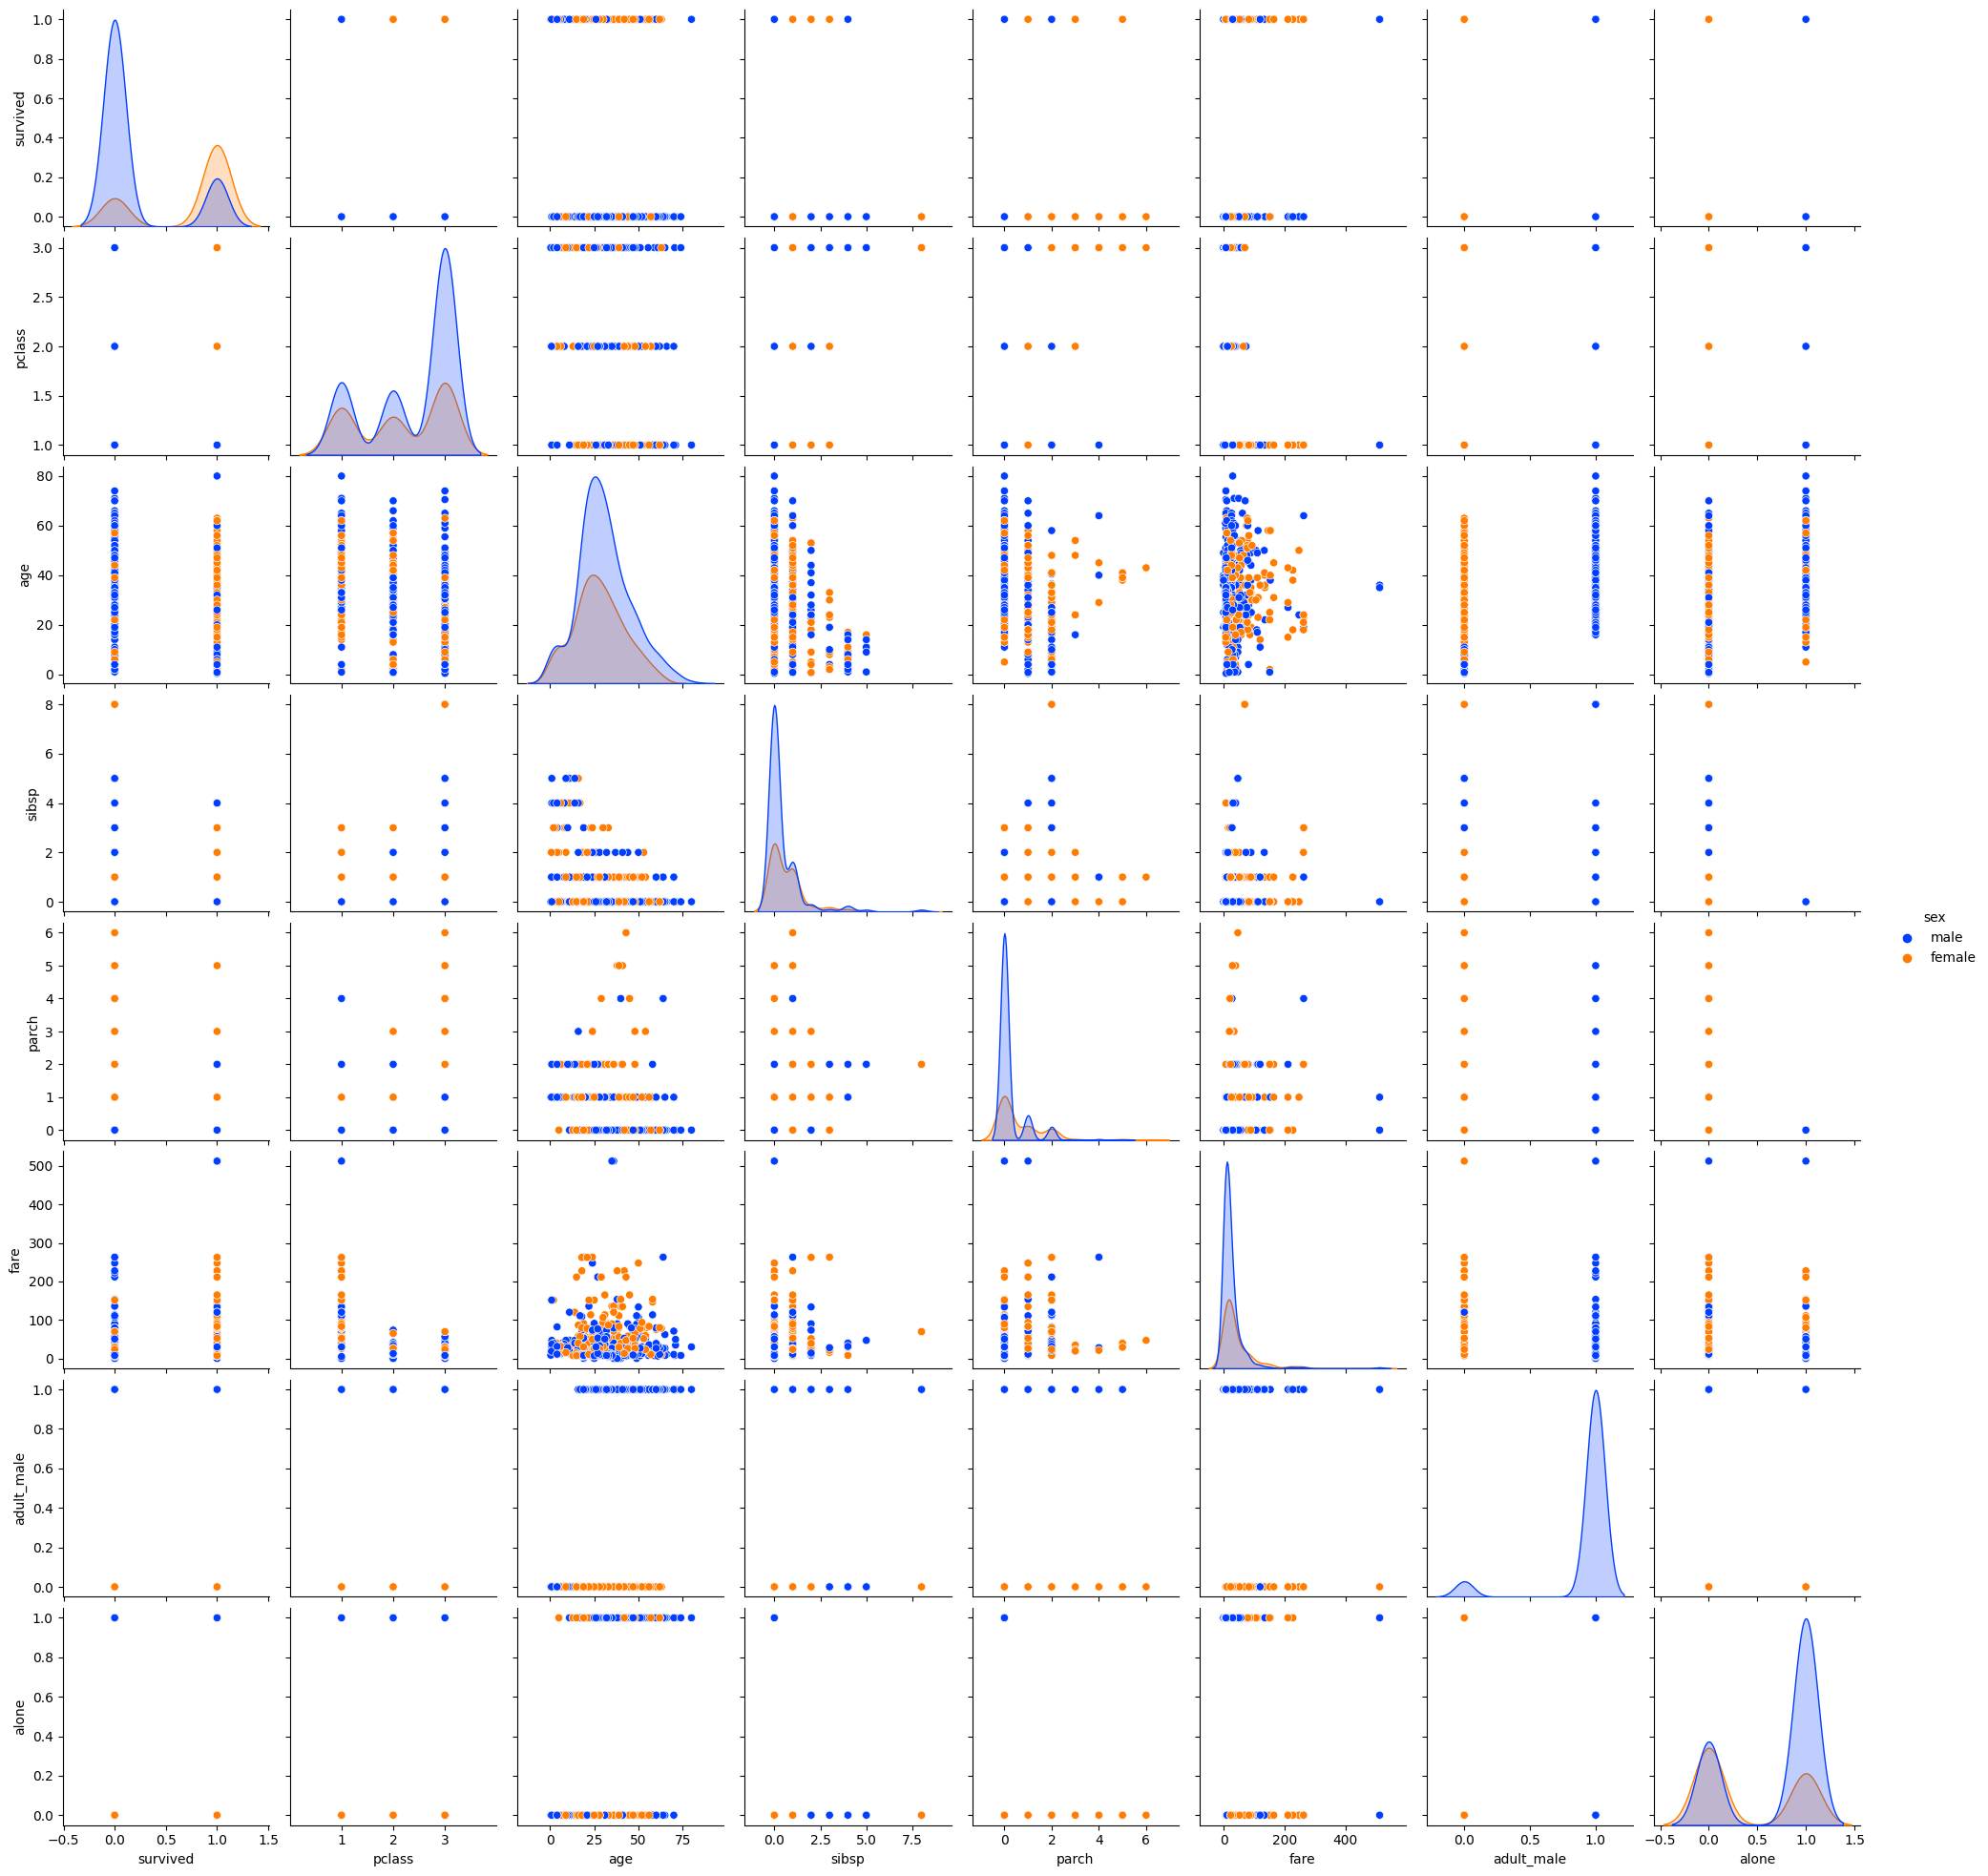

In [193]:
sns.pairplot(data=df, hue='sex', palette='bright')
plt.show()

# Library 3: Bokeh

## Bokeh is an interactive data visualization library for Python. While Bokeh and Matplotlib both help you plot data, these two libraries are different tools for different purposes. If your focus is on website interactivity, then Bokeh is the better choice.

## Let's create a interactive web page with a line chart with Bokeh

In [197]:
import numpy as np
from bokeh.plotting import figure, show

In [204]:
x = np.arange(0, 10, 1)
y1 = x ** 2
y2 = x ** 3
y3 = x ** 4

fig = figure(title = 'Line Chart Example with Bokeh',
            x_axis_label = 'x',
            y_axis_label = 'y')

fig.line(x, y1, legend_label='Quadratic Function', color='red')
fig.line(x, y2, legend_label='Cubic Function', color='green')
fig.line(x, y3, legend_label='Quartic Function', color='blue')

# display legend in top left corner (default is top right corner)
fig.legend.location = "top_left"

show(fig)

## Now let's create a Scatter Plot with Bokeh

In [215]:
x = np.random.random(50) * 10
y = np.random.random(50) * 200

fig = figure(title = 'Scatter Plot Example with Bokeh',
            x_axis_label = 'x',
            y_axis_label = 'y')

fig.circle(x, y, legend_label='Random Points', color='blue')
show(fig)

## Bokeh creates powerful interactive graphs more than just simple plots, you can use Bokeh to build complex user dashboards. Check more interactive demos provided by the Bokeh official website: https://demo.bokeh.org/.

# Good job! You have finished the data visulization exercise for today!